In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams["figure.figsize"] = (14,8)

import warnings
warnings.filterwarnings(action='ignore')

In [101]:
df = pd.read_csv('Датасеты/winequality-white.csv',delimiter=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [103]:
df.drop(['residual sugar','sulphates','fixed acidity','volatile acidity','citric acid','pH','total sulfur dioxide','alcohol'],axis=1,inplace=True)

In [104]:
df.rename(columns={"free sulfur dioxide": "free_sulfur_dioxide"},inplace=True)

In [105]:
df

,chlorides,free_sulfur_dioxide,density,quality
0,0.045,45.0,1.00100,6
1,0.049,14.0,0.99400,6
2,0.050,30.0,0.99510,6
3,0.058,47.0,0.99560,6
4,0.058,47.0,0.99560,6
...,...,...,...,...
4893,0.039,24.0,0.99114,6
4894,0.047,57.0,0.99490,5
4895,0.041,30.0,0.99254,6
4896,0.022,20.0,0.98869,7


In [106]:
# Непрерыные случайные величины
cols_cont = df[['chlorides', 'density']].columns
# Дискретные случайные величины
cols_discr = df[['free_sulfur_dioxide', 'quality']].columns

In [107]:
# Расчет оптимального количества столбцов гистограммы
def number_of_cols(df_num):
    rows = df_num.shape[0]
    num = np.around(1 + 3.32 * np.log(rows)).astype('int64')
    return num

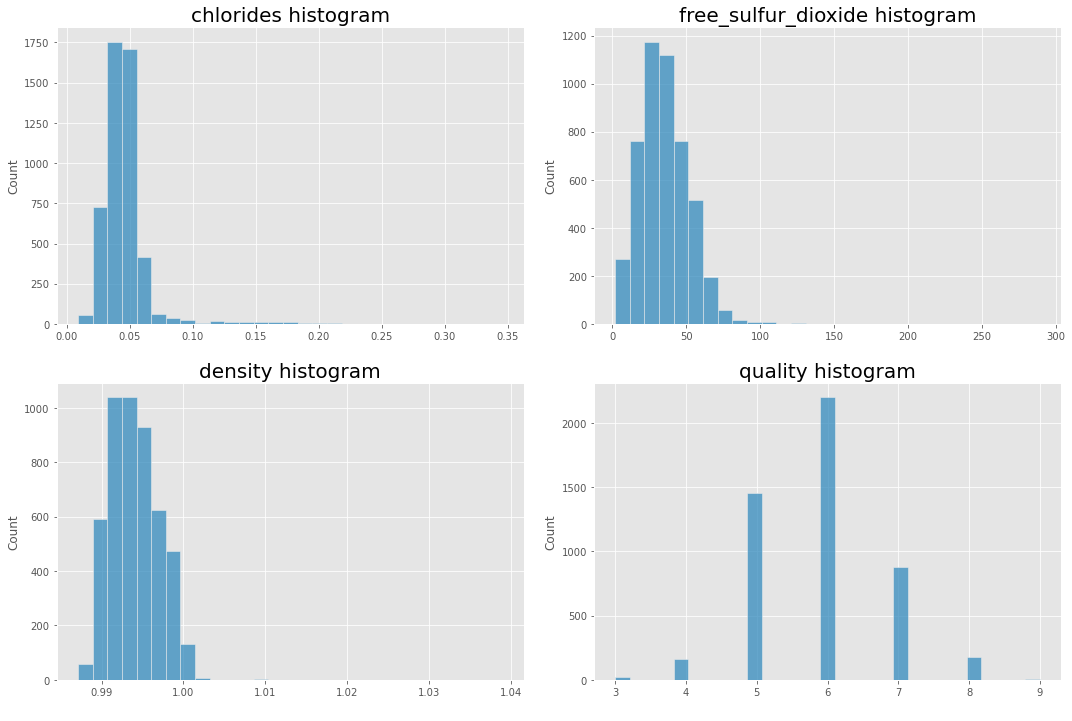

In [108]:
# Гистограммы распределений
import seaborn as sns
plt.figure(figsize=(18,12))
for i in range(1,5):
    plt.subplot(2,2,i)
    plt.subplots_adjust(wspace=0.15, hspace=0.2)
    plt.title(df.columns[i-1] + ' histogram', fontsize=20)
    plt.xlabel(' ')
    sns.histplot(data=df, x=df.columns[i-1],bins=number_of_cols(df))

(array([6.73464923e+00, 6.73464923e+01, 1.18598314e+02, 1.18598314e+02,
        1.06270482e+02, 7.12274766e+01, 5.42196336e+01, 1.48390576e+01,
        9.13172777e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.28293194e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.14146597e-01]),
 array([0.98711   , 0.98889862, 0.99068724, 0.99247586, 0.99426448,
        0.9960531 , 0.99784172, 0.99963034, 1.00141897, 1.00320759,
        1.00499621, 1.00678483, 1.00857345, 1.01036207, 1.01215069,
        1.01393931, 1.01572793, 1.01751655, 1.01930517, 1.02109379,
        1.02288241, 1.02467103, 1.02645966, 1.02824828, 1.0300369 ,
        1.03182552, 1.03361414, 1.03540276, 1.03719138, 1.03898   ]),
 <BarContainer object of 29 artists>)

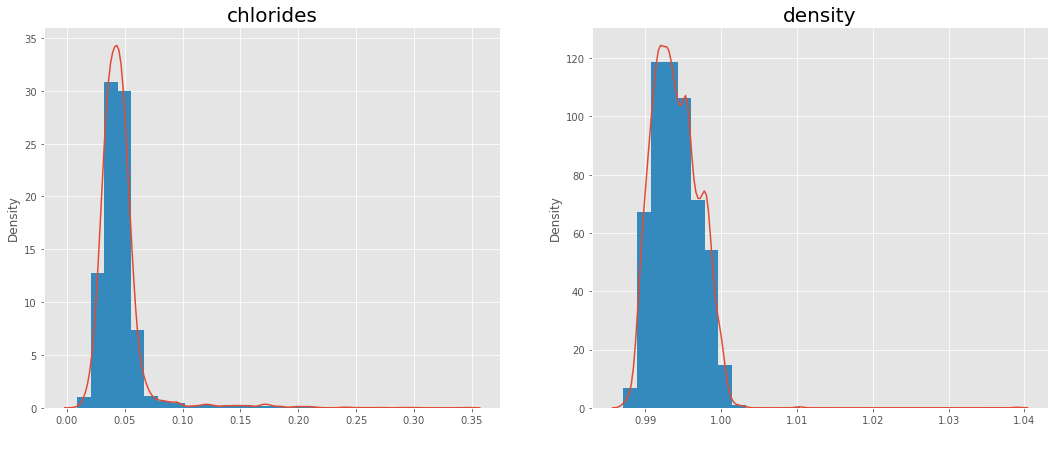

In [112]:
plt.figure(figsize=(18,7))

plt.subplot(1,2,1)
plt.title('chlorides', fontsize=20)
plt.xlabel(' ')
sns.kdeplot(data=df, x='chlorides',bw_adjust=0.9)
plt.hist(df['chlorides'], bins=number_of_cols(df), density=True)

plt.subplot(1,2,2)
plt.title('density', fontsize=20)
plt.xlabel(' ')
sns.kdeplot(data=df, x='density',bw_adjust=0.88)
plt.hist(df['density'], bins=number_of_cols(df), density=True)

In [114]:
df.describe()

,chlorides,free_sulfur_dioxide,density,quality
count,4898.000000,4898.000000,4898.000000,4898.000000
mean,0.045772,35.308085,0.994027,5.877909
std,0.021848,17.007137,0.002991,0.885639
min,0.009000,2.000000,0.987110,3.000000
25%,0.036000,23.000000,0.991723,5.000000
50%,0.043000,34.000000,0.993740,6.000000
75%,0.050000,46.000000,0.996100,6.000000
max,0.346000,289.000000,1.038980,9.000000


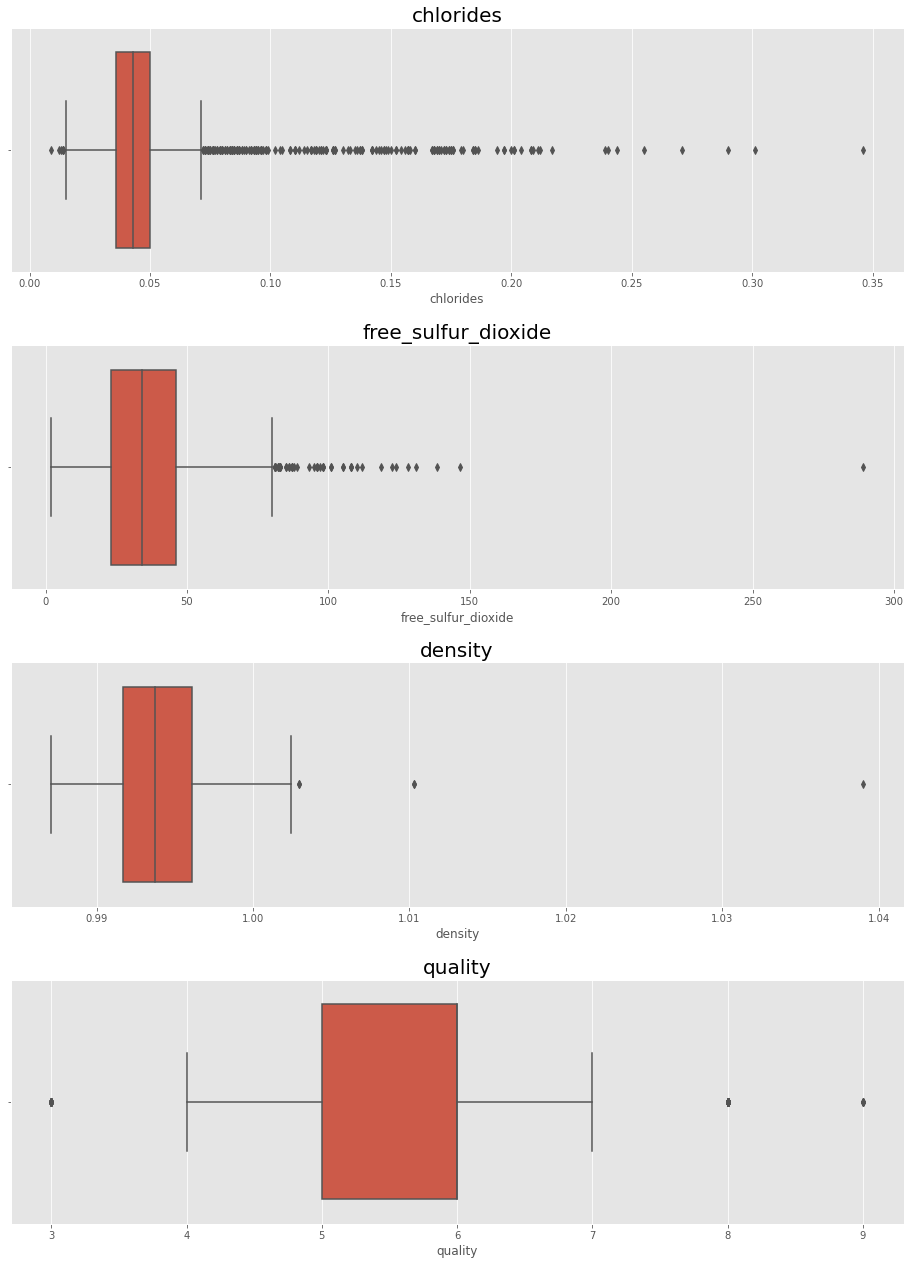

In [115]:
plt.figure(figsize=(16,22))
for i in range(1,5):
    plt.subplot(4,1,i)
    plt.subplots_adjust(hspace=0.3)
    plt.title(df.columns[i-1], fontsize=20)
    sns.boxplot(data=df, x=df.columns[i-1])

In [116]:
# Делаем усеченную выборку
def truncated_array(array):
    array_trunc = []
    quantile_90, quantile_10 = np.percentile(array, [95, 5])
    
    for i in array:
        if i < quantile_90 and i > quantile_10:
            array_trunc.append(i)
    return array_trunc

In [18]:
# # Рассчитываем 95% доверительный интервал для выборочного среднего
# norm_q95 = scipy.stats.norm.ppf(0.95)
# mean_conf = norm_q95 * std / np.sqrt(len(df_clients))

# # Рассчитываем 95% доверительный интервал для дисперсии и стандартного отклонения
# chi2_q95_left = scipy.stats.chi2.ppf((1 - 0.05 / 2.0), df=len(df_clients) - 1)
# chi2_q95_right = scipy.stats.chi2.ppf(0.05 / 2.0, df=len(df_clients) - 1)

# var_conf_left = var * (len(df_clients) - 1) / chi2_q95_left
# var_conf_right = var * (len(df_clients) - 1) / chi2_q95_right
# std_conf_left = np.sqrt(var_conf_left)
# std_conf_right = np.sqrt(var_conf_right)


# print("Sample mean: %0.3f +/- %0.3f" % (mean, mean_conf))
# print("95%% Confidence interval of sample variance : (%0.3f; %0.3f)"
#       % (var_conf_left, var_conf_right))
# print("95%% Confidence interval of sample standard deviation: (%0.3f; %0.3f)"
#       % (std_conf_left, std_conf_right))

In [117]:
# Строим графики теоретических распределений для непрерывной случайной величины
def cols_distplot(array, col):
    plt.figure(figsize=(14,8))
    
    plot = sns.histplot(array, stat='density')
    plt.title(col,fontsize=20)
    
    if col == 'chlorides' or col == 'density':
        list_distr = [scipy.stats.norm, scipy.stats.lognorm, scipy.stats.gamma,scipy.stats.beta,scipy.stats.alpha]
    else:
        list_distr = [scipy.stats.binom]
        
    for distribution in list_distr:
        
        x_plot = np.linspace(np.min(array), np.max(array), 100)
        args = distribution.fit(array)
        print('Распределение', type(distribution).__name__, ', аргументы:', args)
        y_plot = distribution.pdf(x_plot, *args)
        
        sns.lineplot(x_plot, y_plot, label=type(distribution).__name__)
        plt.legend()

Распределение norm_gen , аргументы: (0.04326395589248793, 0.008564798946671538)
Распределение lognorm_gen , аргументы: (0.154651763605492, -0.012241656820302392, 0.0548483827334988)
Распределение gamma_gen , аргументы: (12.142843175031164, 0.012938118210273283, 0.002497424823174321)
Распределение beta_gen , аргументы: (1.610536371145884, 2.501224036410914, 0.02735641233811892, 0.04041105410114855)
Распределение alpha_gen , аргументы: (15.129100974783803, -0.08524381287250019, 1.9356661543497147)


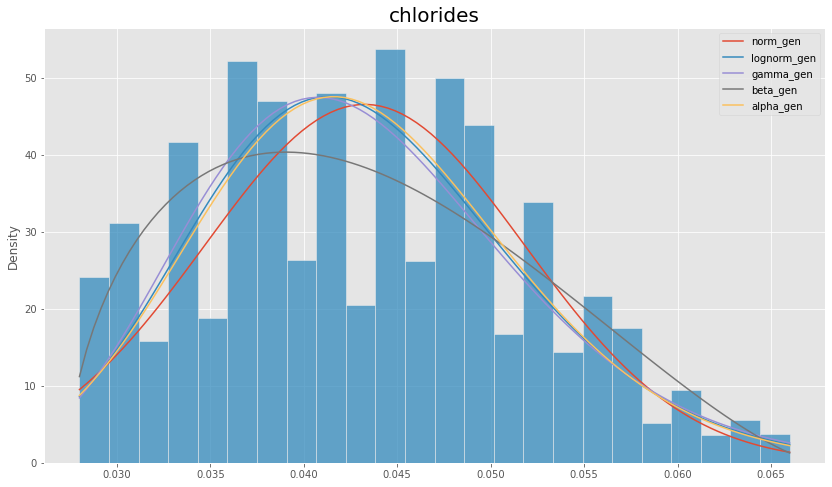

In [118]:
cols_distplot(truncated_array(df.chlorides), 'chlorides')

Распределение norm_gen , аргументы: (0.9939596594005451, 0.0024676400001924286)
Распределение lognorm_gen , аргументы: (1.6846415110606432, 0.9896309279459701, 0.0033395936940278587)
Распределение gamma_gen , аргументы: (6.576593253025589, 0.9873910596958784, 0.0009980992963173293)
Распределение beta_gen , аргументы: (1.1926451692568625, 1.3678158386341592, 0.9896336544934736, 0.009367371546705656)
Распределение alpha_gen , аргументы: (1032.0519212217769, -1.5520906834460702, 2627.6537258022254)


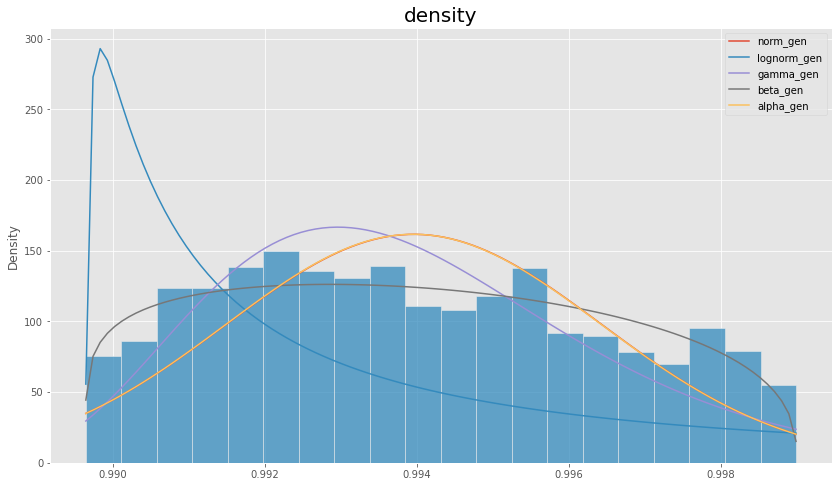

In [119]:
cols_distplot(truncated_array(df.density), 'density')

In [65]:
def loss_function(params, data_in):

    mu = params[0]
    loss = 0

    for i in range(len(data_in)):

        loglikelihood = scipy.stats.poisson.logpmf(data_in[i], mu)
        loss_to_add = -loglikelihood
        loss += loss_to_add

    return(loss)

In [69]:
(df['free_sulfur_dioxide'], )

(0       45.0
 1       14.0
 2       30.0
 3       47.0
 4       47.0
         ... 
 4893    24.0
 4894    57.0
 4895    30.0
 4896    20.0
 4897    22.0
 Name: free_sulfur_dioxide, Length: 4898, dtype: float64,)

In [70]:
params0 = np.array([20])
minimum = scipy.optimize.fmin(loss_function, params0, args=(df['free_sulfur_dioxide'], ))

mu_fit = minimum[0]

print("mu_fit")
print(mu_fit)

mu_fit
20.0


In [82]:
df['free_sulfur_dioxide']

0       45.0
1       14.0
2       30.0
3       47.0
4       47.0
        ... 
4893    24.0
4894    57.0
4895    30.0
4896    20.0
4897    22.0
Name: free_sulfur_dioxide, Length: 4898, dtype: float64

In [85]:
np.array(truncated_array(df['free_sulfur_dioxide']))

array([45., 14., 30., ..., 30., 20., 22.])

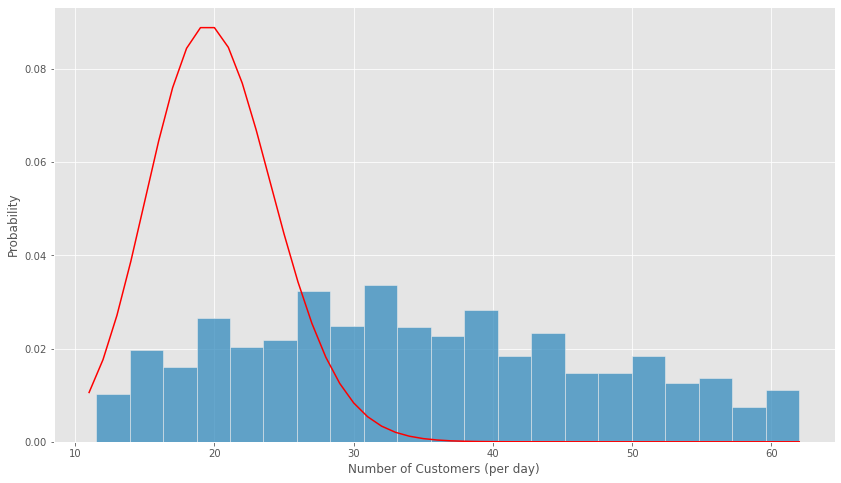

In [90]:
x = list(range(int(np.min(np.array(truncated_array(df['free_sulfur_dioxide'])))), int(np.max(np.array(truncated_array(df['free_sulfur_dioxide']))))+1))
plt.plot(x, scipy.stats.poisson.pmf(x, mu_fit),color="red")
sns.histplot(x=truncated_array(df['free_sulfur_dioxide']), stat='density')
plt.xlabel("Number of Customers (per day)")
plt.ylabel("Probability")
plt.show()

In [126]:
def return_biplot(array, distribution):
    
    figure, ax = plt.subplots(1, 1, figsize=(8, 5))
    
    args = distribution.fit(array)
    print('Распределение', type(distribution).__name__, 'аргументы:', args)
    scipy.stats.probplot(array, dist=distribution, sparams=(args), plot=ax)
    
    ax.get_lines()[0].set_marker('o')
    
    ax.get_lines()[1].set_ls('--')
    ax.get_lines()[1].set_color('black')
    ax.get_lines()[1].set_linewidth(0.75)
    
    plt.show()

Распределение gamma_gen аргументы: (6.576593253025589, 0.9873910596958784, 0.0009980992963173293)


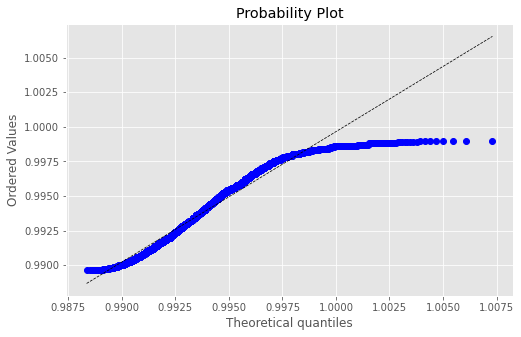

In [127]:
return_biplot(truncated_array(df.density), distribution=scipy.stats.gamma)

Распределение beta_gen аргументы: (1.1926451692568625, 1.3678158386341592, 0.9896336544934736, 0.009367371546705656)


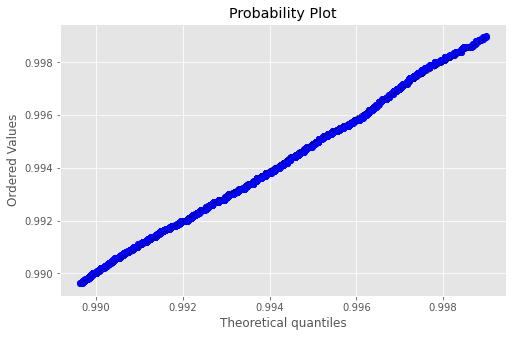

In [128]:
return_biplot(truncated_array(df.density), distribution=scipy.stats.beta)

Распределение gamma_gen аргументы: (12.142843175031164, 0.012938118210273283, 0.002497424823174321)


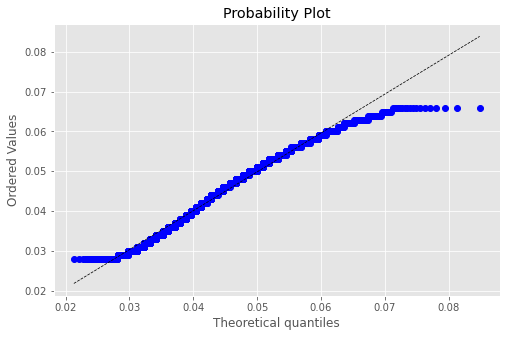

In [129]:
return_biplot(truncated_array(df.chlorides), distribution=scipy.stats.gamma)

Распределение beta_gen аргументы: (1.610536371145884, 2.501224036410914, 0.02735641233811892, 0.04041105410114855)


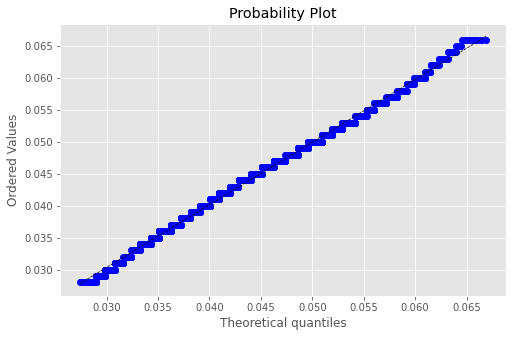

In [130]:
return_biplot(truncated_array(df.chlorides), distribution=scipy.stats.beta)

In [133]:
def stat_test(array, distribution, cdf):
    args = distribution.fit(array)
    
    kstest = scipy.stats.kstest(array, cdf=cdf, args=args).pvalue
#     cramervonmises = scipy.stats.wilcoxon(array, cdf=cdf, args=args).pvalue
    
    print('Kolmogorov-Smirnov Test: {:.5f}'.format(kstest))
#     print('Wilcoxon Test: {:.5f}'.format(cramervonmises))

In [134]:
stat_test(truncated_array(df.chlorides), distribution=scipy.stats.beta, cdf='beta')

Kolmogorov-Smirnov Test: 0.00000


In [135]:
params = scipy.stats.beta.fit(df['chlorides'])

ks = scipy.stats.kstest(df['chlorides'], 'beta', params, N=100)
chi2 = scipy.stats.chisquare(df['chlorides'])
print(ks)
print(chi2)

KstestResult(statistic=0.12360956442355697, pvalue=1.1013809807219159e-65)
Power_divergenceResult(statistic=51.06801087009853, pvalue=1.0)
